# Projet 3 - Pr√©parez des donn√©es pour un organisme de sant√© publique

# Contexte & Objectifs 
## D√©terminer les objectifs du nettoyage des donn√©es et de la d√©marche de mise en ≈ìuvre afin de construire un jeu de donn√©es adapt√© √† une probl√©matique m√©tier. 

- Identifier et filtrer les variables pertinentes
- Traiter les valeurs aberrantes pour am√©liorer la qualit√© des donn√©es.
- G√©rer les valeurs manquantes avec des m√©thodes d'imputation ***(x3)***
- R√©aliser des analyses univari√©es pour comprendre la distribution des variables.
- Effectuer des analyses bivari√©es pour √©tudier les relations entre deux variables.
- Mener une analyse multivari√©e pour comprendre les interactions complexes entre variables.


## Effectuer des op√©rations de nettoyage sur des donn√©es structur√©es, notamment l‚Äôidentification d‚Äôoutliers et le remplissage de donn√©es manquantes, dans le respect des normes en vigueur (RGPD) afin de proposer des donn√©es exploitables pour une probl√©matique m√©tier.

- a 
- b 
- c

## Effectuer des analyses statistiques univari√©es et multivari√©es, notamment des tests statistiques, √† partir de donn√©es structur√©es et nettoy√©es afin de pr√©senter leur distribution, valider leur coh√©rence et d√©tecter des corr√©lations

- a 
- b 
- c

## Repr√©senter des donn√©es gr√¢ce √† des graphiques afin d‚Äôexpliciter et justifier les analyses r√©alis√©es.

- a 
- b 
- c

#### Installation des librairies

In [346]:
# %pip install pandas numpy scikit-learn matplotlib seaborn*
# %pip install skimpy
# %pip install missingno
# %pip install scipy

In [347]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import skim
import missingno as msno
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [348]:
# Lecture du dataframe
df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')

# Faire une copie du dataframe pour garder le dataframe original intact de toute modification
df = df_origin.copy()
df.head()

C:\Users\vuill\AppData\Local\Temp\ipykernel_6356\3293951688.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de bl√© noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [349]:
# Donne un aper√ßu des valeurs numeriques du df
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

Apr√®s visualisation une premiere visualisation du dataframe grace a .describe, il semble y avoir des valeurs manquantes.

Nous allons donc afficher la heatmap des valeurs manquantes pour verifier cette hypoth√®se

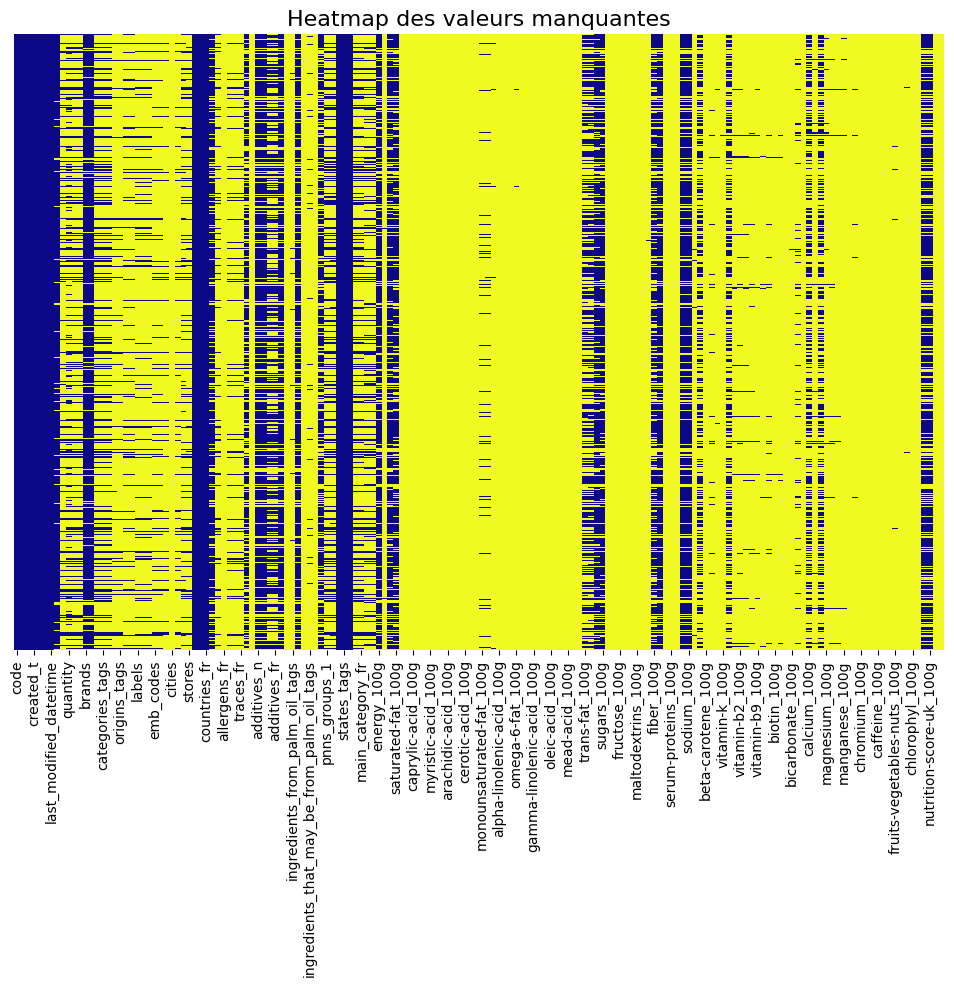

In [350]:
# Faire une Heatmap des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.sample(10_000).isnull(), cmap='plasma', cbar=False, yticklabels=False)
plt.title('Heatmap des valeurs manquantes', fontsize=16)

plt.show()


Il y a en effet beaucoup de valeurs manquantes comme nous pouvons le voir grace a la pr√©sence de la couleur jaune dans la  heatmap, nous allons donc proceder a un premier filtre du dataframe, c'est a dire supprimer les colonnes qui ont plus que 50% de valeurs manquantes. 

Pourquoi 50% ? Pour plusieurs facteur differents :

- La Pertinence des donn√©es
- Possibilit√© d‚Äôavoir des informations significatives.
- Plus de possibilit√©s pour remplir ou imputer les donn√©es ("Meilleur imputation")
- Permet de conserver des variables potentiellement importantes.
- √âquilibre entre nettoyage et conservation des donn√©es.
- Offre une plus grande flexibilit√© pour diverses m√©thodes d'analyse.




In [351]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percent = df.isnull().mean() * 100
X = 50

# Filtrer les colonnes qui ont plus de X% de valeurs manquantes
cols_with_many_missing = missing_percent[missing_percent > X].index

# Afficher les colonnes concern√©es
print(f"Colonnes avec plus de {X}% de valeurs manquantes : {len(cols_with_many_missing)}")

df = df.drop(columns=cols_with_many_missing)

# Afficher les colonnes concern√©es
print(f"Colonnes restante: {168 - len(cols_with_many_missing)}")

Colonnes avec plus de 50% de valeurs manquantes : 128
Colonnes restante: 40


<Axes: >

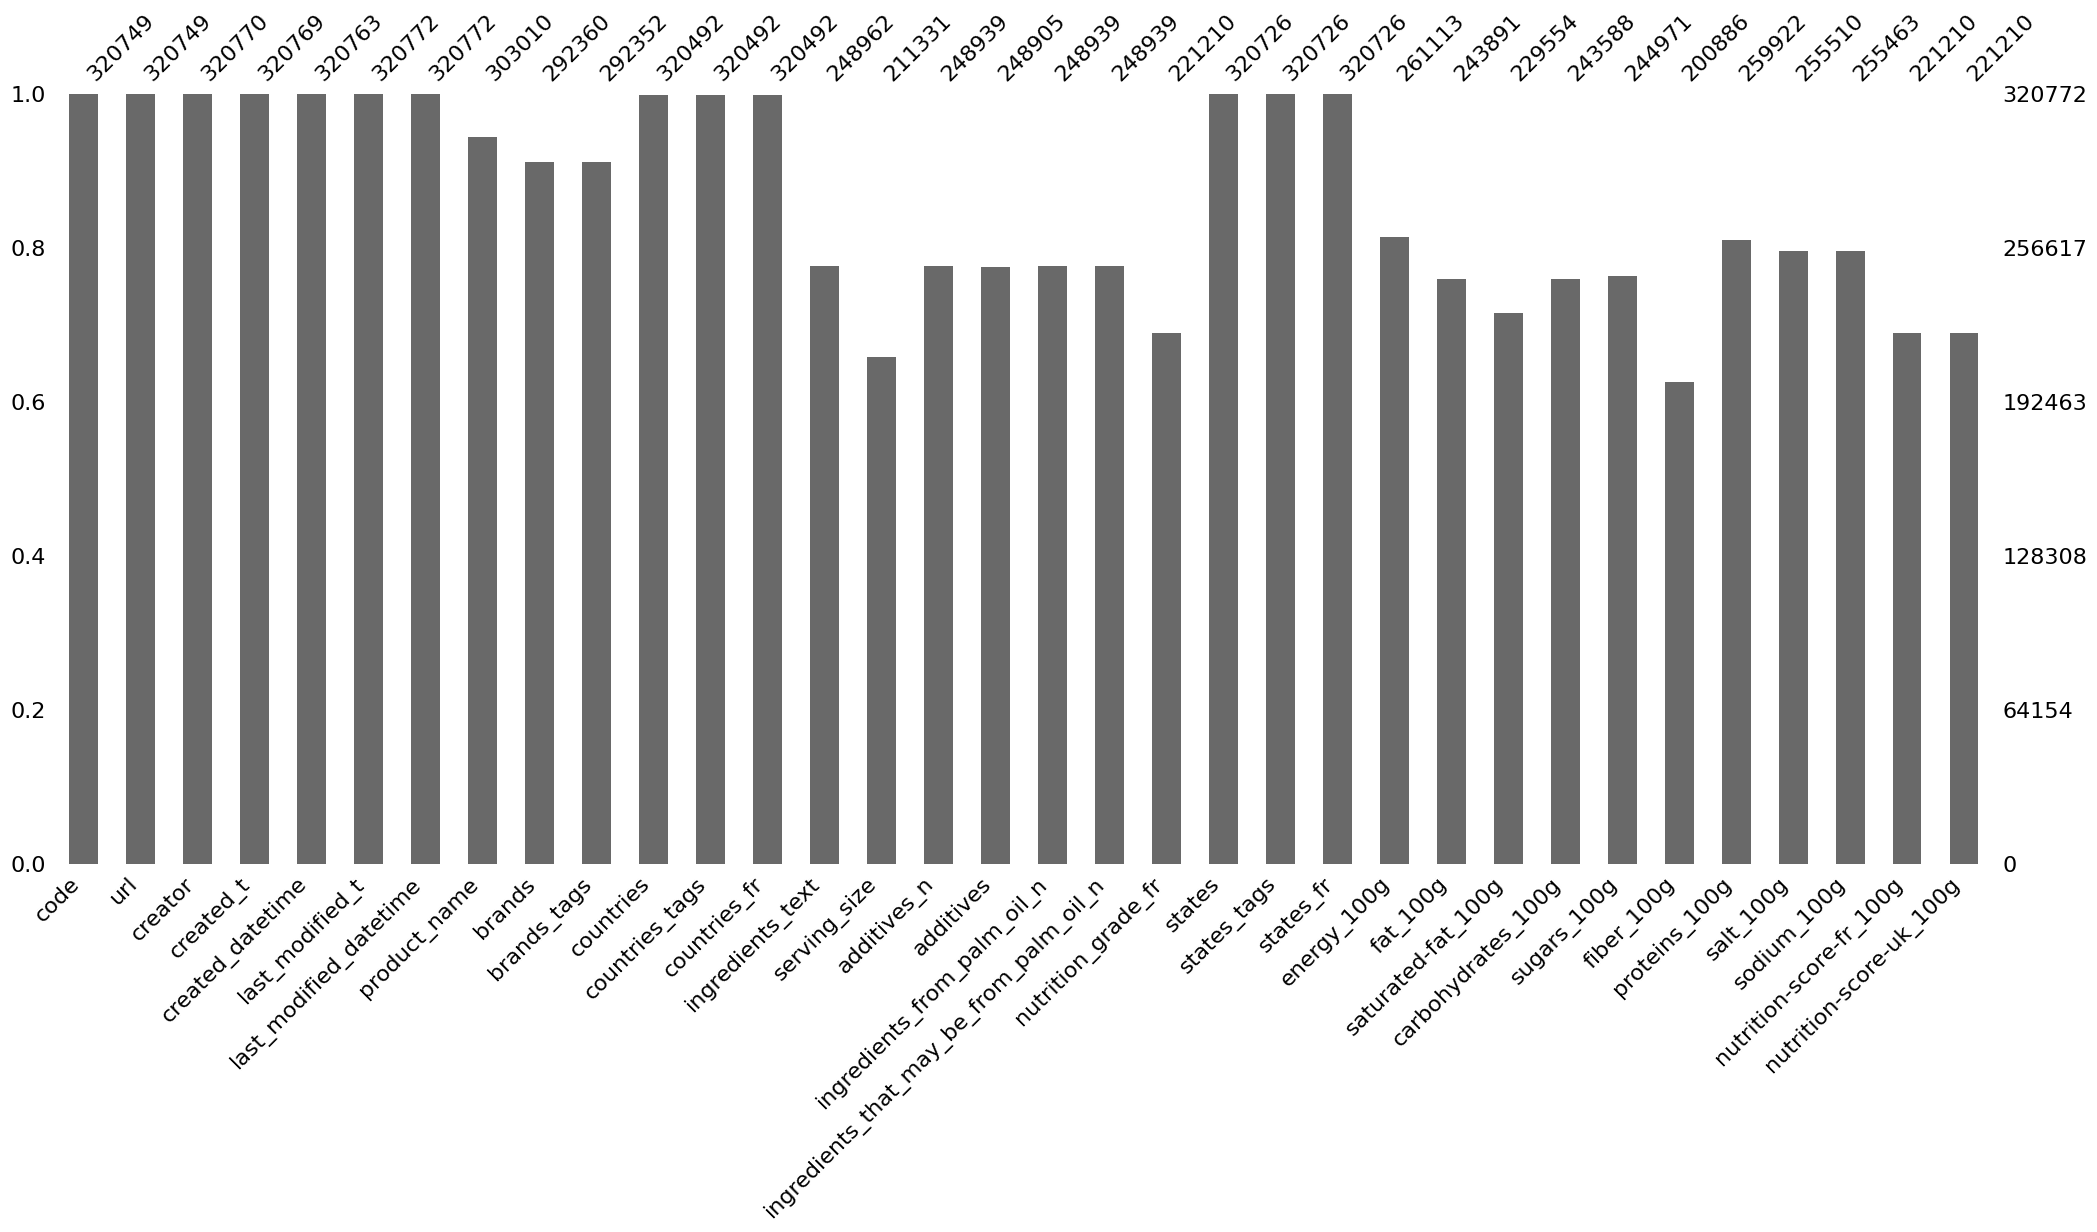

In [352]:
# Verification des valeurs manquantes apr√®s supression des colonnes vides
msno.bar(df)

Nous avons constat√© qu'il y avait plus de 120 colonnes pr√©sentant plus de 50 % de valeurs manquantes. En les supprimant, nous effectuons ainsi une premi√®re s√©lection des donn√©es, en ne conservant que les colonnes les plus pertinentes.

Maintenant que nous avons supprimer les colonnes contenant le moins d'information, il serait pertinent de verifier si elle sont de qualit√©, en verifiants plusieurs point:
- Si il y a des valeurs aberantes

- Si il y a des doublons dans les colonnes et dans les lignes

- Si les unit√© de mesures sont correcte

Commen√ßon par ce a quoi elle corresponde: 

# Que repr√©sente les colonnes ?

## üåç Information g√©n√©rale
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **code**               | Le code unique du produit dans la base de donn√©es.                                                   |
| **url**                | L'URL du produit sur le site OpenFoodFacts.                                                          |
| **creator**            | L'identifiant ou le nom de la personne qui a cr√©√© l'entr√©e du produit.                               |
| **created_t**          | L'horodatage de cr√©ation de l'entr√©e du produit.                                                     |
| **created_datetime**   | La date et l'heure de cr√©ation de l'entr√©e du produit.                                               |
| **last_modified_t**    | L'horodatage de la derni√®re modification apport√©e √† l'entr√©e du produit.                             |
| **last_modified_datetime** | La date et l'heure de la derni√®re modification apport√©e √† l'entr√©e du produit.                     |

## üè∑ Marque et Pays
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **product_name**       | Le nom du produit tel qu'il est indiqu√© sur l'emballage ou dans la base de donn√©es.                  |
| **brands**             | La ou les marques associ√©es au produit.                                                              |
| **brands_tags**        | Les mots-cl√©s ou tags li√©s √† la marque, pour faciliter la recherche et le filtrage.                  |
| **countries**          | Les pays dans lesquels le produit est disponible ou commercialis√©.                                   |
| **countries_tags**     | Les mots-cl√©s ou tags associ√©s aux pays du produit.                                                  |
| **countries_fr**       | La version fran√ßaise des pays associ√©s au produit.                                                   |

## üçΩ Ingr√©dients et Additifs
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **ingredients_text**   | La liste des ingr√©dients pr√©sents dans le produit, souvent directement copi√©e de l'√©tiquette.        |
| **serving_size**       | La taille de la portion recommand√©e pour le produit.                                                 |
| **additives**          | La liste des additifs alimentaires pr√©sents dans le produit.                                         |
| **additives_n**        | Le nombre total d'additifs alimentaires pr√©sents dans le produit.                                   |
| **ingredients_from_palm_oil_n** | Le nombre d'ingr√©dients dans le produit qui proviennent d'huile de palme.                     |
| **ingredients_that_may_be_from_palm_oil_n** | Indique si certains ingr√©dients peuvent provenir d'huile de palme.                 |

## üçè Valeurs nutritionnelles
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **energy_100g**        | L'√©nergie (en kilojoules) contenue dans 100 grammes du produit.                                      |
| **fat_100g**           | La quantit√© de graisses (en grammes) contenue dans 100 grammes du produit.                          |
| **saturated-fat_100g** | La quantit√© de graisses satur√©es (en grammes) contenue dans 100 grammes du produit.                 |
| **carbohydrates_100g** | La quantit√© de glucides (en grammes) contenue dans 100 grammes du produit.                          |
| **sugars_100g**        | La quantit√© de sucres (en grammes) contenue dans 100 grammes du produit.                            |
| **fiber_100g**         | La quantit√© de fibres alimentaires (en grammes) contenue dans 100 grammes du produit.               |
| **proteins_100g**      | La quantit√© de prot√©ines (en grammes) contenue dans 100 grammes du produit.                         |
| **salt_100g**          | La quantit√© de sel (en grammes) contenue dans 100 grammes du produit.                               |
| **sodium_100g**        | La quantit√© de sodium (en grammes) contenue dans 100 grammes du produit.                            |
| **energy_kcal**        | L'√©nergie (en kilocalories) contenue dans 100 grammes du produit.                                   |

## üèÖ Scores et √âtiquettes
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **nutrition_grade_fr** | La note nutritionnelle du produit, souvent exprim√©e sous forme de lettre, en fran√ßais.               |
| **nutrition-score-fr_100g** | Le score nutritionnel du produit pour le march√© fran√ßais, bas√© sur des crit√®res de sant√©.           |
| **nutrition-score-uk_100g** | Le score nutritionnel du produit pour le march√© britannique, bas√© sur des crit√®res de sant√©.        |
| **states**             | Les √©tats ou conditions sous lesquels le produit est vendu (par exemple, bio, sans gluten).           |
| **states_tags**        | Les mots-cl√©s ou tags associ√©s aux √©tats du produit.                                                 |
| **states_fr**          | La version fran√ßaise des √©tats associ√©s au produit.                                                  |

# Analyse uni/multi vari√© des colonnes *_100g

In [353]:
# R√©cuperer les colonnes de valeurs nutritionnelles (vn)
df_vn = df.filter(like='_100g')

In [354]:
df_vn.describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  2.611130e+05  243891.000000       229554.000000       243588.000000   
mean   1.141915e+03      12.730379            5.129932           32.073981   
std    6.447154e+03      17.578747            8.014238           29.731719   
min    0.000000e+00       0.000000            0.000000            0.000000   
25%    3.770000e+02       0.000000            0.000000            6.000000   
50%    1.100000e+03       5.000000            1.790000           20.600000   
75%    1.674000e+03      20.000000            7.140000           58.330000   
max    3.251373e+06     714.290000          550.000000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244971.000000  200886.000000  259922.000000  255510.000000   
mean       16.003484       2.862111       7.075940       2.028624   
std        22.327284      12.867578       8.409054     128.269454   
min       -17.860000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max      3520.000000    5380.000000     430.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255463.000000            221210.000000            221210.000000  
mean        0.798815                 9.165535                 9.058049  
std        50.504428                 9.055903                 9.183589  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

Verifions si les donn√©es indiqu√© par le .describe sont coherante en nous basant sur les donn√©es de l'[European Food Safety Authority (EFSA)](https://www.efsa.europa.eu/en)

| **Colonne**                           | **Moyenne Observ√©e** | **Unit√©**      | **Valeur Moyenne Tol√©r√©e** |
|---------------------------------------|----------------------|----------------|----------------------------|
| energy_100g                           | 1141,92              | kJ             | 800 √† 2500                 |
| energy_100g                           | 272,92               | kcal           | 200 √† 600                  |
| fat_100g                              | 12,73                | g              | 0 √† 20                     |
| saturated-fat_100g                    | 5,13                 | g              | 0 √† 10                     |
| carbohydrates_100g                    | 32,07                | g              | 10 √† 60                    |
| sugars_100g                           | 16,00                | g              | 0 √† 30                     |
| fiber_100g                            | 2,86                 | g              | 2 √† 10                     |
| proteins_100g                         | 7,08                 | g              | 5 √† 25                     |
| salt_100g                             | 2,03                 | g              | 0 √† 5                      |
| sodium_100g                           | 0,80                 | g              | 0 √† 2                      |
| nutrition-score-fr_100g               | 9,17                 | score          | -15 √† 40                   |
| nutrition-score-uk_100g               | 9,06                 | score          | -15 √† 40                   |


Les valeurs moyennes sont coherante par rapport au valeur tolere en UE, cepeandant pour s'assurer que les donn√©es sont coherante nous allont tracer leur diqtibution grace a undiagramme boite a moustache 

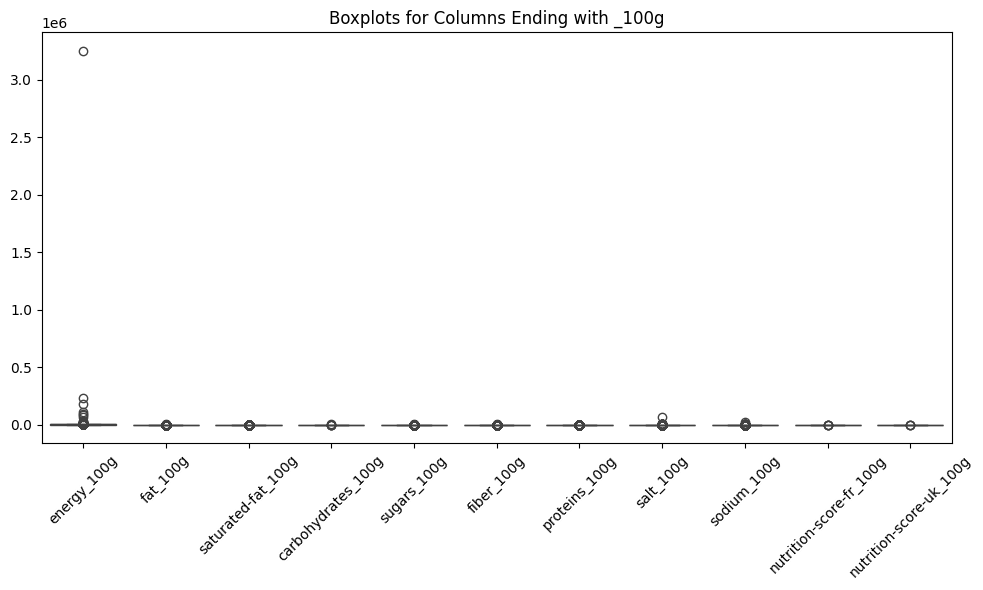

In [355]:
# Creation d'un boxplot pour chaque collone de valeur nutritionnel
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_vn)
plt.title('Boxplots for Columns Ending with _100g')
plt.xticks(rotation=45)  # Faire pivoter les √©tiquettes de l'axe x pour une meilleure lisibilit√©
plt.tight_layout()  # Ajuster la mise en page
plt.show()  # Afficher le graphique


Nous pouvons constater que la colonne energy est encline au valeur aberantes de facon extreme,pour ne pas fausser notre analyse, on passe en echelle logarithmique pour avoir une meilleur visibilit√© generale et on isole la colonne energy

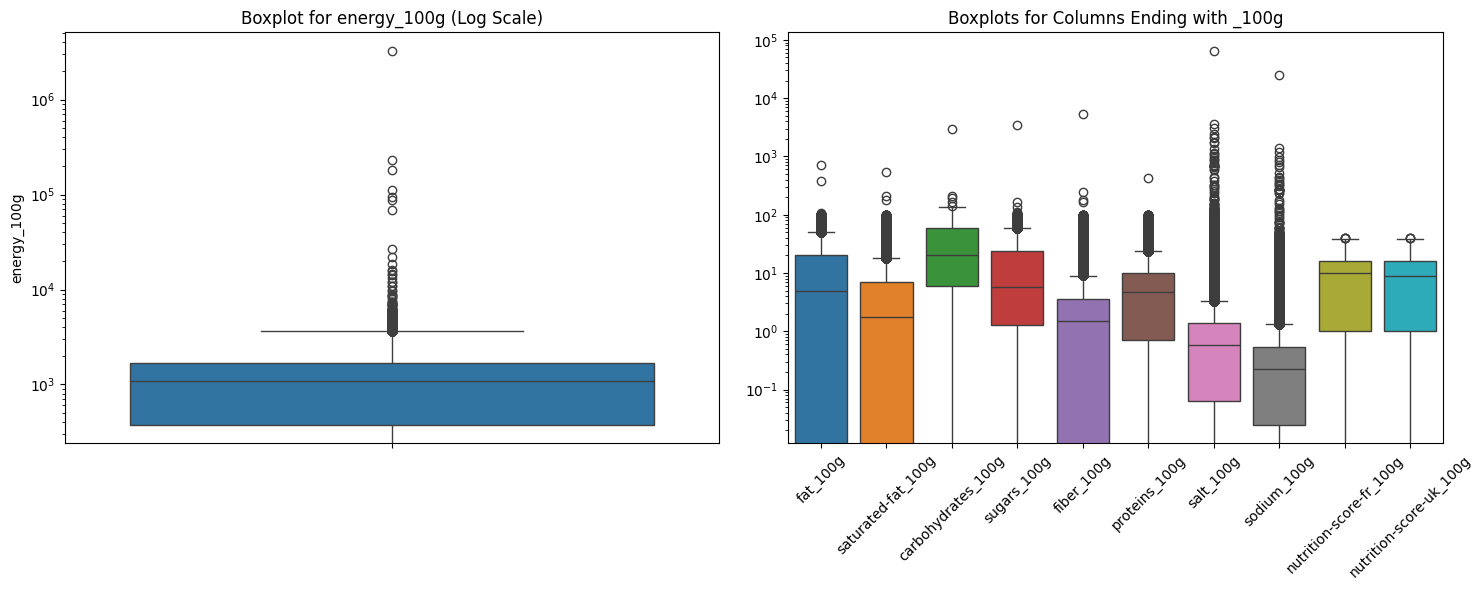

In [356]:
# suppression de la col energy_100g pour affichage
df_to_plot = df_vn.drop('energy_100g', axis=1)

# R√©cup√©rer les colonnes qui se terminent par '_100g' dans un dataframe
data_to_plot = df_to_plot.filter(like='_100g')

# Cr√©ation des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique
sns.boxplot(data=df_vn['energy_100g'], ax=axes[0])
axes[0].set_title('Boxplot for energy_100g (Log Scale)')
axes[0].set_yscale('log')  # Appliquer l'√©chelle logarithmique sur l'axe y



# Deuxi√®me graphique
sns.boxplot(data=data_to_plot, ax=axes[1])
axes[1].set_title('Boxplots for Columns Ending with _100g')
axes[1].tick_params(axis='x', rotation=45) 

# Ajuster la mise en page
plt.tight_layout()  
plt.yscale('log')

# Afficher le graphique
plt.show()

Nous voyons ici des outliers or  nous savons que pour 1 produit il est impossible que sa valeur nutritionnel soit proche de 100 ou la depasse et pareil si < 0, nous somme donc sujet ici a des valeurs aberantes et non a des valeurs atypique.

Nous devons donc les identifi√©s, pour ce faire je vais utilis√© la methode du zscore

Avant toute chose nous pouvons voir que la colonne energy a des valeurs tr√®s haute avec une moyenne de 1100 et apr√®s verification il semblerai qu'elle soit exprimer en kj et non en gramme, 
il serait donc judicieurx de la retirer du df_vn (valeur nutritionel) et de la renomme dans le df original

La colonne nutrition score uk semble etre un doublon de la colonne nutriscore fr, pour cette analyse j'ai donc decid√© de la retir√©

In [357]:
# Renommer la colonne dans le df et supprimer la colonne dans df_vn
df.rename(columns={'energy_100g':'energy_kj'})
df_vn.drop(columns=['energy_100g', 'nutrition-score-uk_100g'], axis=1, inplace=True)

# Supprime toutes les valeurs > 100g et < 0 
df_vn = df_vn.applymap(lambda x: np.nan if x > 100 or x < 0 else x)
df_vn.describe()

C:\Users\vuill\AppData\Local\Temp\ipykernel_6356\880343426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vn.drop(columns=['energy_100g', 'nutrition-score-uk_100g'], axis=1, inplace=True)
C:\Users\vuill\AppData\Local\Temp\ipykernel_6356\880343426.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vn = df_vn.applymap(lambda x: np.nan if x > 100 or x < 0 else x)


fat_100g  saturated-fat_100g  carbohydrates_100g    sugars_100g  \
count  243887.000000       229551.000000       243569.000000  244952.000000   
mean       12.725256            5.125925           32.055323      15.985449   
std        17.503695            7.913684           29.140680      21.165362   
min         0.000000            0.000000            0.000000       0.000000   
25%         0.000000            0.000000            6.000000       1.300000   
50%         5.000000            1.790000           20.600000       5.710000   
75%        20.000000            7.140000           58.330000      24.000000   
max       100.000000          100.000000          100.000000     100.000000   

          fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  200881.000000  259918.000000  255352.000000  255429.000000   
mean        2.832473       7.079409       1.588497       0.647145   
std         4.588272       8.156552       6.242531       2.656343   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.700000       0.063500       0.025000   
50%         1.500000       4.760000       0.580000       0.229000   
75%         3.600000      10.000000       1.371600       0.541000   
max       100.000000     100.000000     100.000000     100.000000   

       nutrition-score-fr_100g  
count            185504.000000  
mean                 11.587324  
std                   7.783573  
min                   0.000000  
25%                   4.000000  
50%                  12.000000  
75%                  18.000000  
max                  40.000000

## Identification des outliers avec l' IQR

L'IQR (Intervalle Interquartile) est une mesure de la dispersion qui repr√©sente la diff√©rence entre le premier quartile (Q1) et le troisi√®me quartile (Q3) d'un ensemble de donn√©es, permettant d'identifier les valeurs aberrantes situ√©es en dehors de 1,5 fois l'IQR au-dessus de Q3 ou en dessous de Q1.

In [358]:
df_vn_iqr = df_vn.copy()

# V√©rifier si les colonnes sont bien num√©riques
df_vn_iqr = df_vn_iqr.apply(pd.to_numeric, errors='coerce')

# Calculer les quartiles
Q1 = df_vn_iqr.quantile(0.25)
Q3 = df_vn_iqr.quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# D√©finir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacer les valeurs par NaN si elles sont en dehors des limites
df_vn_iqr[(df_vn_iqr < lower_bound) | (df_vn_iqr > upper_bound)] = np.NaN

# V√©rifier le r√©sultat
df_vn_iqr.describe()


fat_100g  saturated-fat_100g  carbohydrates_100g    sugars_100g  \
count  235491.000000       212307.000000       243569.000000  229656.000000   
mean       10.489088            3.502599           32.055323      12.130217   
std        12.693443            4.548423           29.140680      15.161924   
min         0.000000            0.000000            0.000000       0.000000   
25%         0.000000            0.000000            6.000000       1.070000   
50%         4.350000            1.400000           20.600000       4.800000   
75%        18.000000            5.700000           58.330000      18.400000   
max        50.000000           17.840000          100.000000      58.000000   

          fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  186758.000000  247329.000000  239019.000000  238977.000000   
mean        1.914766       5.887682       0.718245       0.282850   
std         2.213757       5.998737       0.774157       0.304824   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       0.048260       0.019000   
50%         1.200000       4.230000       0.475000       0.188000   
75%         3.300000       9.000000       1.186180       0.467000   
max         9.000000      23.940000       3.332480       1.315000   

       nutrition-score-fr_100g  
count            185500.000000  
mean                 11.586712  
std                   7.782539  
min                   0.000000  
25%                   4.000000  
50%                  12.000000  
75%                  18.000000  
max                  38.000000

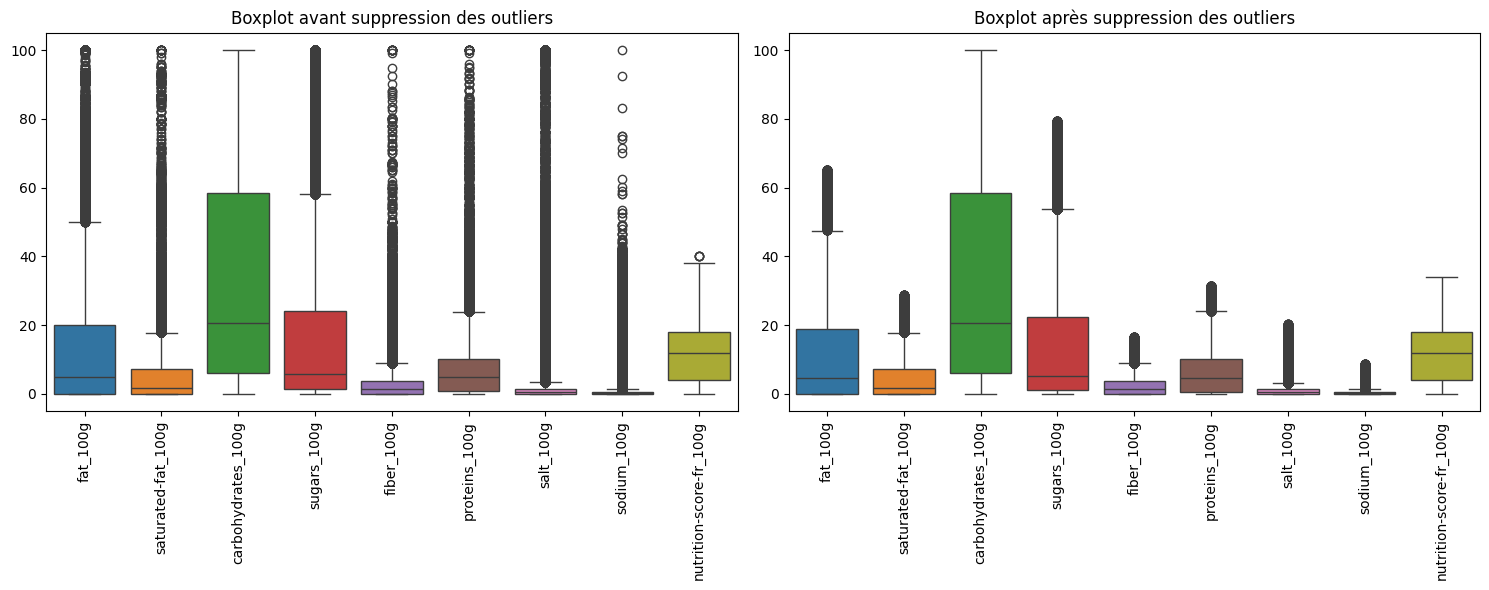

In [359]:
# Cr√©er un subplot avec 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  
sns.boxplot(data=df_vn, ax=axs[0])
axs[0].set_title("Boxplot avant suppression des outliers")
axs[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df_vn_zscore, ax=axs[1])  # Utilisez axs[1] pour le deuxi√®me subplot
axs[1].set_title("Boxplot apr√®s suppression des outliers")
axs[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()
